## nheatmap

## Load library

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import sklearn.decomposition, sklearn.cluster
from nheatmap import nhm, scripts
import matplotlib.pyplot as plt
import matplotlib as mpl

## Generate Data

In [2]:
df = scripts.simulate_data(nrows=120)
nrows, ncols = np.shape(df)
pc = sklearn.decomposition.PCA().fit(df)
dfr = pd.DataFrame(pc.transform(df)[:, 0], index=['sample '+str(x) for x in np.arange(1, nrows+1)],
        columns=['PC1'])
dfr['cell cluster'] = sklearn.cluster.KMeans(n_clusters=20).fit_predict(df).astype(str)
dfc = pd.DataFrame(pc.components_[0], index=['gene '+str(x) for x in
    np.arange(1, ncols+1)], columns=['PC score'])
dfc['gene cluster'] = sklearn.cluster.KMeans(n_clusters=10).fit_predict(df.T).astype(str)
dfc['PC score 2'] = pc.components_[1]
cmaps={'cell cluster':'Paired', 'PC1':'RdYlGn', 'gene cluster':'inferno',
        'PC score':'gist_heat', 'PC score 2':'rainbow'}
dfsmall = df.iloc[:20, :10]
dfrsmall = dfr.iloc[:20]
dfcsmall = dfr.iloc[:10]

In [3]:
df.head()

,gene 1,gene 2,gene 3,gene 4,gene 5,gene 6,gene 7,gene 8,gene 9,gene 10,...,gene 51,gene 52,gene 53,gene 54,gene 55,gene 56,gene 57,gene 58,gene 59,gene 60
sample 1,1.882921,2.997669,1.478299,6.793888,2.435808,6.688177,1.605246,6.775754,2.584612,3.140674,...,1.164831,1.222201,2.384667,3.257269,6.759078,2.413597,2.928882,3.333354,3.278340,1.872248
sample 2,2.999489,6.680756,8.271615,6.714201,0.065335,6.661275,2.879696,6.717115,3.279826,3.317344,...,0.895729,2.293295,3.235481,3.310395,3.210755,1.158374,2.789298,6.680698,0.565118,0.723095
sample 3,1.232170,6.736702,7.693613,6.762621,2.874634,3.242723,6.665294,2.340105,6.786430,2.995952,...,3.143547,1.735357,3.085095,2.104826,1.008499,6.758389,1.412897,2.864756,3.256880,0.096713
sample 4,7.715754,6.748901,6.752170,2.305238,7.700583,3.323630,3.171148,3.045409,0.382654,6.687136,...,0.696394,1.479129,3.181478,2.433907,1.854991,2.509574,1.608936,2.507677,3.056290,1.881591
sample 5,2.173901,6.778673,1.920252,3.189296,6.711809,2.554866,6.733866,2.944408,2.987572,0.020819,...,2.533444,2.989842,3.249087,3.223117,0.857043,1.033825,1.109530,2.975921,1.296373,7.673886


In [4]:
dfr.head()

,PC1,cell cluster
sample 1,-1.302067,7
sample 2,-5.873039,14
sample 3,-7.803389,8
sample 4,-4.489366,4
sample 5,-4.869735,12


In [5]:
dfc.head()

,PC score,gene cluster,PC score 2
gene 1,-0.085665,2,-0.066640
gene 2,-0.152802,2,-0.120631
gene 3,-0.182235,2,-0.150136
gene 4,-0.117846,6,-0.126109
gene 5,-0.185143,6,-0.129827


## Make some plots

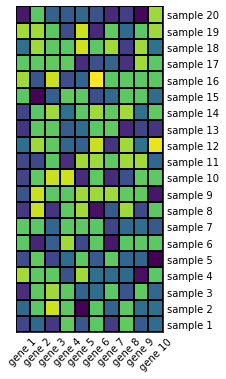

In [6]:
g = nhm(data=dfsmall)
fig, plots = g.run()

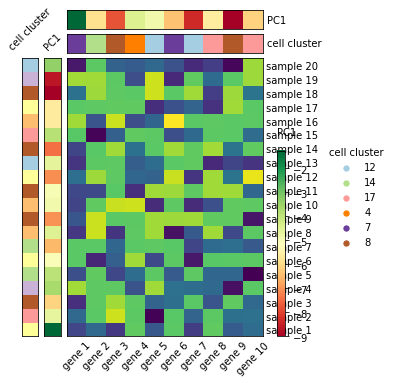

In [8]:
g = nhm(data=dfsmall, dfr=dfrsmall, dfc=dfcsmall, figsize=(6, 6), linewidths=0, cmaps=cmaps)
fig, plots = g.run()

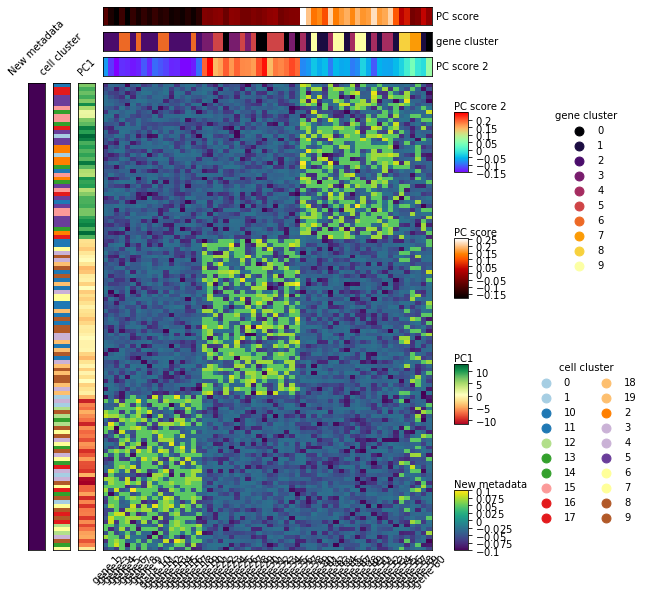

In [12]:
g = nhm(data=df, dfr=dfr, dfc=dfc, figsize=(10, 10), linewidths=0, cmaps=cmaps)
fig, plots = g.run()

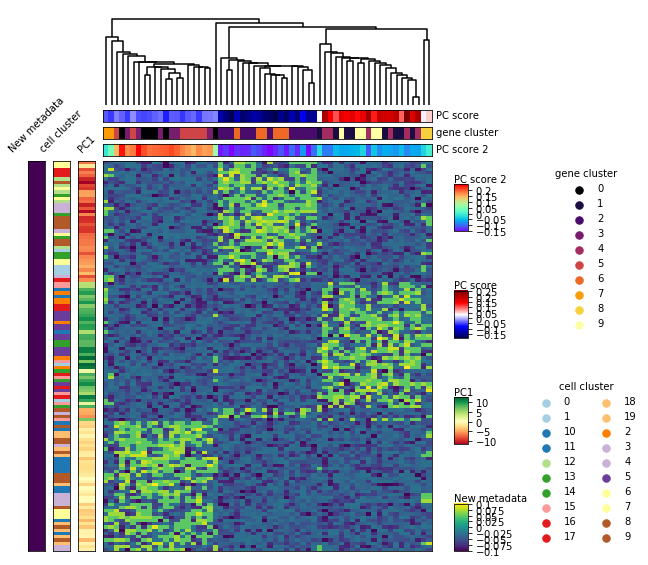

In [19]:
g = nhm(data=df, dfr=dfr, dfc=dfc, figsize=(10, 10), linewidths=0, cmaps=cmaps, showxticks=False)
g.hcluster(showRdendrogram=False)
fig, plots = g.run()